# Exercici 1

**Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

He triat el famós discurs de Marthin Luther King del 28 d'agost de 1963, l'he extret d'aquesta pàgina web i l'he copiat i passat a format 'txt.'

[Enllaç](http://www.let.rug.nl/usa/documents/1951-/martin-luther-kings-i-have-a-dream-speech-august-28-1963.php)

In [2]:
with open('Discurso de Martin Luther King.txt', 'r') as file:
    midsummer = file.read().replace('\n', '')
midsummer


'I am happy to join with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation. Five score years ago, a great American, in whose symbolic shadow we stand today, signed the Emancipation Proclamation. This momentous decree came as a great beacon light of hope to millions of Negro slaves who had been seared in the flames of withering injustice. It came as a joyous daybreak to end the long night of captivity. But one hundred years later, the Negro still is not free. One hundred years later, the life of the Negro is still sadly crippled by the manacles of segregation and the chains of discrimination. One hundred years later, the Negro lives on a lonely island of poverty in the midst of a vast ocean of material prosperity. One hundred years later, the Negro is still languished in the corners of American society and finds himself in exile in his own land. So we have come here today to dramatize an shameful condition. In a sense we\'ve

[Enllaç NLTK](https://www.datacamp.com/tutorial/text-analytics-beginners-nltk)

In [3]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nltk.download('punkt')

nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('omw-1.4')

from collections import Counter
from nltk.probability import FreqDist

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to /Users/ullaaller/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ullaaller/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ullaaller/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ullaaller/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Dividim el text en paraules:

In [4]:
tokenized_word=word_tokenize(midsummer)
tokenized_word

['I',
 'am',
 'happy',
 'to',
 'join',
 'with',
 'you',
 'today',
 'in',
 'what',
 'will',
 'go',
 'down',
 'in',
 'history',
 'as',
 'the',
 'greatest',
 'demonstration',
 'for',
 'freedom',
 'in',
 'the',
 'history',
 'of',
 'our',
 'nation',
 '.',
 'Five',
 'score',
 'years',
 'ago',
 ',',
 'a',
 'great',
 'American',
 ',',
 'in',
 'whose',
 'symbolic',
 'shadow',
 'we',
 'stand',
 'today',
 ',',
 'signed',
 'the',
 'Emancipation',
 'Proclamation',
 '.',
 'This',
 'momentous',
 'decree',
 'came',
 'as',
 'a',
 'great',
 'beacon',
 'light',
 'of',
 'hope',
 'to',
 'millions',
 'of',
 'Negro',
 'slaves',
 'who',
 'had',
 'been',
 'seared',
 'in',
 'the',
 'flames',
 'of',
 'withering',
 'injustice',
 '.',
 'It',
 'came',
 'as',
 'a',
 'joyous',
 'daybreak',
 'to',
 'end',
 'the',
 'long',
 'night',
 'of',
 'captivity',
 '.',
 'But',
 'one',
 'hundred',
 'years',
 'later',
 ',',
 'the',
 'Negro',
 'still',
 'is',
 'not',
 'free',
 '.',
 'One',
 'hundred',
 'years',
 'later',
 ',',
 'th

Obtenim la freqüència de cada paraula:

In [5]:
fdist = FreqDist(tokenized_word)

I les 30 paraules més freqüents:

In [6]:
fdist.most_common(30)

[('the', 101),
 ('of', 99),
 ('.', 79),
 (',', 68),
 ('to', 59),
 ('and', 40),
 ('a', 36),
 ('be', 32),
 ('will', 27),
 ('that', 25),
 ('is', 24),
 ('in', 21),
 ('we', 21),
 ('as', 20),
 ('freedom', 20),
 ('not', 19),
 ('have', 19),
 ('our', 17),
 ('from', 17),
 ('I', 15),
 ('Negro', 15),
 ('with', 13),
 ('this', 12),
 ('ring', 12),
 ('nation', 11),
 ('We', 11),
 ('day', 11),
 ('dream', 11),
 ('one', 10),
 ('come', 10)]

In [7]:
fdist.tabulate(10)

 the   of    .    ,   to  and    a   be will that 
 101   99   79   68   59   40   36   32   27   25 


Fem un gràfic amb aquestes 30 paraules per visualitzar-les millor:

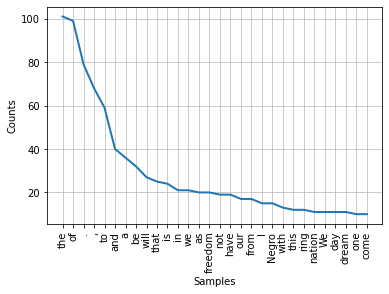

In [8]:
fdist.plot(30,cumulative=False)
plt.show()

Creem i generem una imatge de núvol de paraules per poder fer-nos una primera idea aproximada de les paraules més utilitzades i, per tant, del tema o temes que tracta:

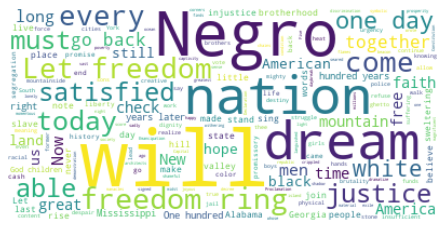

In [9]:
wordcloud = WordCloud(background_color='white').generate(midsummer)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Exercici 2

**Treu les stopwords i realitza stemming al teu conjunt de dades.**

Primer extraiem els signes de puntuació del nostre text:

In [10]:
import re

print('Nombre de tokens al nostre text abans de netejar signes de puntuació: ',len(tokenized_word))

tokenized_word = [re.sub("[^-9A-Za-z ]", "" , w) for w in tokenized_word]

while '' in tokenized_word:
    tokenized_word.remove('')

print('Nombre de tokens al nostre text després de netejar signes de puntuació: ',len(tokenized_word))

Nombre de tokens al nostre text abans de netejar signes de puntuació:  1832
Nombre de tokens al nostre text després de netejar signes de puntuació:  1664


·Els **Stop Word** són aquelles paraules buides, que no estan registrades pels robots de Google. Són paraules que no tenen cap significat i que per aquest motiu els cercadors no les consideren a l'hora de posicionar el contingut a la SERPs. Els algorismes no les tenen en compte a l'hora de posicionar-ne els resultats, ja que és molt més efectiu.

· Obtenim la llista de Stopwords d'un mòdul de la llibreria NLTK, fem un set amb elles:

In [11]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'when', 'aren', 'hasn', 'on', "mightn't", 'so', 'down', 'ma', 't', 'me', 'who', 'through', 'being', 'our', 'having', 'myself', 'but', 'm', 'at', 'himself', 'don', "she's", "haven't", 'too', 'this', 'there', 'couldn', 'further', 'them', 'isn', 'wasn', "that'll", 'over', "shan't", 'won', 'about', 'few', "couldn't", 'both', 'their', 're', 'which', 'does', 'while', 'than', 'doesn', 'ourselves', 'own', 'herself', 'any', 'where', 'those', 'now', "won't", 'do', 'him', 'after', 'to', 'did', 'an', 'that', 'between', 'each', 'then', 'yourselves', 'as', 'how', 'they', "hasn't", 'if', 'whom', 'the', 'i', 'can', 'once', 'by', 'during', 'off', 'from', 'what', 'and', 'itself', 'against', "didn't", 'out', 'he', 'her', 'themselves', 'you', 'most', 'yours', 'because', 's', "don't", "wasn't", 'only', 'theirs', 'some', 'of', 'd', 'it', 'such', "should've", 'should', "needn't", 'hadn', "you'll", "you'd", 'these', 'before', 'mightn', 'weren', 'am', 'all', 'have', 'were', 've', 'into', 'doing', 'until', 'ab

In [12]:
filtered_text=[]
for word in tokenized_word:
    if word not in stop_words:
        filtered_text.append(word)
print("Tokenized Sentence:",tokenized_word)
print('')
print("Filterd Sentence:",filtered_text)

Tokenized Sentence: ['I', 'am', 'happy', 'to', 'join', 'with', 'you', 'today', 'in', 'what', 'will', 'go', 'down', 'in', 'history', 'as', 'the', 'greatest', 'demonstration', 'for', 'freedom', 'in', 'the', 'history', 'of', 'our', 'nation', 'Five', 'score', 'years', 'ago', 'a', 'great', 'American', 'in', 'whose', 'symbolic', 'shadow', 'we', 'stand', 'today', 'signed', 'the', 'Emancipation', 'Proclamation', 'This', 'momentous', 'decree', 'came', 'as', 'a', 'great', 'beacon', 'light', 'of', 'hope', 'to', 'millions', 'of', 'Negro', 'slaves', 'who', 'had', 'been', 'seared', 'in', 'the', 'flames', 'of', 'withering', 'injustice', 'It', 'came', 'as', 'a', 'joyous', 'daybreak', 'to', 'end', 'the', 'long', 'night', 'of', 'captivity', 'But', 'one', 'hundred', 'years', 'later', 'the', 'Negro', 'still', 'is', 'not', 'free', 'One', 'hundred', 'years', 'later', 'the', 'life', 'of', 'the', 'Negro', 'is', 'still', 'sadly', 'crippled', 'by', 'the', 'manacles', 'of', 'segregation', 'and', 'the', 'chains',

*Stemming* és un mètode per reduir una paraula a la seva arrel o (en anglès) a un stem. Hi ha alguns algorismes de stemming que ajuden en sistemes de recuperació d'informació. Stemming augmenta el recall que és una mida sobre el nombre de documents que es poden trobar amb una consulta. Per exemple, una consulta sobre "biblioteques" també troba documents en què només aparegui "bibliotecari" perquè el stem de les dues paraules és el mateix ("bibliotec").


In [13]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_words=[]
for w in filtered_text:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_text)
print('')
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['I', 'happy', 'join', 'today', 'go', 'history', 'greatest', 'demonstration', 'freedom', 'history', 'nation', 'Five', 'score', 'years', 'ago', 'great', 'American', 'whose', 'symbolic', 'shadow', 'stand', 'today', 'signed', 'Emancipation', 'Proclamation', 'This', 'momentous', 'decree', 'came', 'great', 'beacon', 'light', 'hope', 'millions', 'Negro', 'slaves', 'seared', 'flames', 'withering', 'injustice', 'It', 'came', 'joyous', 'daybreak', 'end', 'long', 'night', 'captivity', 'But', 'one', 'hundred', 'years', 'later', 'Negro', 'still', 'free', 'One', 'hundred', 'years', 'later', 'life', 'Negro', 'still', 'sadly', 'crippled', 'manacles', 'segregation', 'chains', 'discrimination', 'One', 'hundred', 'years', 'later', 'Negro', 'lives', 'lonely', 'island', 'poverty', 'midst', 'vast', 'ocean', 'material', 'prosperity', 'One', 'hundred', 'years', 'later', 'Negro', 'still', 'languished', 'corners', 'American', 'society', 'finds', 'exile', 'land', 'So', 'come', 'today', 'drama

In [14]:
fdist = FreqDist(stemmed_words)
print(fdist)

<FreqDist with 457 samples and 888 outcomes>


In [15]:
stemmed_words

['I',
 'happi',
 'join',
 'today',
 'go',
 'histori',
 'greatest',
 'demonstr',
 'freedom',
 'histori',
 'nation',
 'five',
 'score',
 'year',
 'ago',
 'great',
 'american',
 'whose',
 'symbol',
 'shadow',
 'stand',
 'today',
 'sign',
 'emancip',
 'proclam',
 'thi',
 'moment',
 'decre',
 'came',
 'great',
 'beacon',
 'light',
 'hope',
 'million',
 'negro',
 'slave',
 'sear',
 'flame',
 'wither',
 'injustic',
 'It',
 'came',
 'joyou',
 'daybreak',
 'end',
 'long',
 'night',
 'captiv',
 'but',
 'one',
 'hundr',
 'year',
 'later',
 'negro',
 'still',
 'free',
 'one',
 'hundr',
 'year',
 'later',
 'life',
 'negro',
 'still',
 'sadli',
 'crippl',
 'manacl',
 'segreg',
 'chain',
 'discrimin',
 'one',
 'hundr',
 'year',
 'later',
 'negro',
 'live',
 'lone',
 'island',
 'poverti',
 'midst',
 'vast',
 'ocean',
 'materi',
 'prosper',
 'one',
 'hundr',
 'year',
 'later',
 'negro',
 'still',
 'languish',
 'corner',
 'american',
 'societi',
 'find',
 'exil',
 'land',
 'So',
 'come',
 'today',
 'dra

Aquesta seria la llista de les 30 paraules més freqüents després de treure-li les stopwords i tenint en compte els 'stems' o arrels de cada paraula:

In [16]:
fdist.most_common(30)

[('freedom', 20),
 ('I', 15),
 ('negro', 15),
 ('one', 13),
 ('let', 13),
 ('ring', 12),
 ('nation', 11),
 ('We', 11),
 ('day', 11),
 ('dream', 11),
 ('come', 10),
 ('everi', 10),
 ('today', 9),
 ('back', 9),
 ('satisfi', 9),
 ('go', 8),
 ('justic', 8),
 ('must', 8),
 ('abl', 8),
 ('thi', 7),
 ('white', 7),
 ('togeth', 7),
 ('long', 6),
 ('men', 6),
 ('year', 5),
 ('great', 5),
 ('free', 5),
 ('right', 5),
 ('america', 5),
 ('time', 5)]

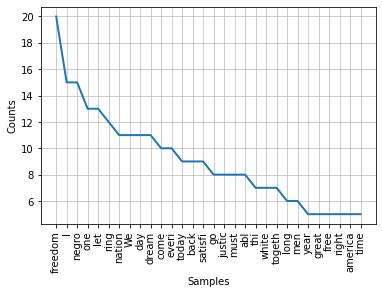

In [17]:
fdist.plot(30,cumulative=False)
plt.show()


# Exercici 3

**Realitza sentiment analysis al teu conjunt de dades.**

'Tokeniçem' o separem el nostre text en frases per poder analitzar-ho millor:

In [18]:
from nltk.tokenize import sent_tokenize
tokenized_sent=sent_tokenize(midsummer)
print(tokenized_sent)

['I am happy to join with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation.', 'Five score years ago, a great American, in whose symbolic shadow we stand today, signed the Emancipation Proclamation.', 'This momentous decree came as a great beacon light of hope to millions of Negro slaves who had been seared in the flames of withering injustice.', 'It came as a joyous daybreak to end the long night of captivity.', 'But one hundred years later, the Negro still is not free.', 'One hundred years later, the life of the Negro is still sadly crippled by the manacles of segregation and the chains of discrimination.', 'One hundred years later, the Negro lives on a lonely island of poverty in the midst of a vast ocean of material prosperity.', 'One hundred years later, the Negro is still languished in the corners of American society and finds himself in exile in his own land.', 'So we have come here today to dramatize an shameful con

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ullaaller/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

VaderSentiment retorna un diccionari de puntajes de sentiment per al text a analitzar. Cada revisió té una puntuación negativa, una puntuación neutral, una puntuación positiva i una puntuación composta. El puntaje compound és una avaluació integral dels primers tres puntatges. Aquest puntaje varia de -1 a 1.

In [20]:
for sentence in tokenized_sent:
    sid = SentimentIntensityAnalyzer()
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()
    print()    


I am happy to join with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation.
compound: 0.9403, 
neg: 0.0, 
neu: 0.572, 
pos: 0.428, 

Five score years ago, a great American, in whose symbolic shadow we stand today, signed the Emancipation Proclamation.
compound: 0.6249, 
neg: 0.0, 
neu: 0.796, 
pos: 0.204, 

This momentous decree came as a great beacon light of hope to millions of Negro slaves who had been seared in the flames of withering injustice.
compound: 0.5106, 
neg: 0.113, 
neu: 0.673, 
pos: 0.214, 

It came as a joyous daybreak to end the long night of captivity.
compound: 0.6249, 
neg: 0.0, 
neu: 0.728, 
pos: 0.272, 

But one hundred years later, the Negro still is not free.
compound: -0.4023, 
neg: 0.213, 
neu: 0.787, 
pos: 0.0, 

One hundred years later, the life of the Negro is still sadly crippled by the manacles of segregation and the chains of discrimination.
compound: -0.4215, 
neg: 0.113, 
neu: 0.887, 
pos: 

Passem els resultats a un dataframe per poder visualitzar-los millor: 

In [21]:
df_text = pd.DataFrame((tokenized_sent), columns=['token'])
df_text['neg'] = df_text['token'].apply(lambda x:sid.polarity_scores(x)['neg'])
df_text['neu'] = df_text['token'].apply(lambda x:sid.polarity_scores(x)['neu'])
df_text['pos'] = df_text['token'].apply(lambda x:sid.polarity_scores(x)['pos'])
df_text['compound'] = df_text['token'].apply(lambda x:sid.polarity_scores(x)['compound'])

df_text

,token,neg,neu,pos,compound
0,I am happy to join with you today in what will...,0.000,0.572,0.428,0.9403
1,"Five score years ago, a great American, in who...",0.000,0.796,0.204,0.6249
2,This momentous decree came as a great beacon l...,0.113,0.673,0.214,0.5106
3,It came as a joyous daybreak to end the long n...,0.000,0.728,0.272,0.6249
4,"But one hundred years later, the Negro still i...",0.213,0.787,0.000,-0.4023
...,...,...,...,...,...
78,Let freedom ring from every hill and molehill ...,0.000,0.682,0.318,0.6369
79,"From every mountainside, let freedom ring.",0.000,0.543,0.457,0.6369
80,"And when this happens, and when we allow freed...",0.000,0.849,0.151,0.8977
81,Free at last!,0.000,0.358,0.642,0.5562


Com podem observar l'única frase que ens dóna un compound negatiu és la frase cinc, en la posició 4:"But one hundred years later, the Negro still is not free."\
La que ens dóna un compound més positiu és la primera frase:"I am happy to join with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation."\
En general, tenint en compte l'anàlisi de sentiments, podem dir que el discurs de Marthin Luther King té un missatge majorment postiu. On destaquen les paraules: "freedom", "I", i "negre"; cosa que ens dóna una idea aproximada del tema que tracta: Llibertat i negritut.